In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
df = pd.read_csv('train_rows.csv') #class is given for each molecule
df

SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-    C%  nCp  nO  \
0      3.919   2.6909    0         0         0       0     0  31.4    2   0   
1      4.170   2.1144    0         0         0       0     0  30.8    1   1   
2      3.932   3.2512    0         0         0       0     0  26.7    2   4   
3      3.000   2.7098    0         0         0       0     0  20.0    0   2   
4      4.236   3.3944    0         0         0       0     0  29.4    2   4   
..       ...      ...  ...       ...       ...     ...   ...   ...  ...  ..   
832    3.000   1.7389    1         0         0       0     0  25.0    2   0   
833    5.051   3.5320    0         0         2       0     0  30.0    2   6   
834    4.876   2.8477    0         0         2       0     0  30.0    2   2   
835    4.953   3.4085    0         0         2       0     2  40.0    1   2   
836    5.418   3.1768   10         0         0       0    12  54.5    0   0   

     ...  C-026  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A  nN  SM6_B(m)  nArCOOR  \
0    ...      0         0      0       2.949    1.591   0     7.253        0   
1    ...      0         0      0       3.315    1.967   0     7.257        0   
2    ...      0         0      1       3.076    2.417   0     7.601        0   
3    ...      0         0      1       3.046    5.000   0     6.690        0   
4    ...      0         0      0       3.351    2.405   0     8.003        0   
..   ...    ...       ...    ...         ...      ...  ..       ...      ...   
832  ...      0         0      0       6.867    2.083   0    11.561        0   
833  ...      0         2      6       3.519    2.435   1     8.710        0   
834  ...      0         3      2       3.631    2.900   2     8.126        0   
835  ...      1         2      0       3.853    2.803   1     8.521        0   
836  ...     10         0      0       4.361    2.778   0    10.237        0   

     nX  Class  
0     0      1  
1     0      1  
2     0      1  
3     0      1  
4     0      1  
..   ..    ...  
832   1      0  
833   0      0  
834   0      0  
835   0      0  
836  10      0  

[837 rows x 42 columns]

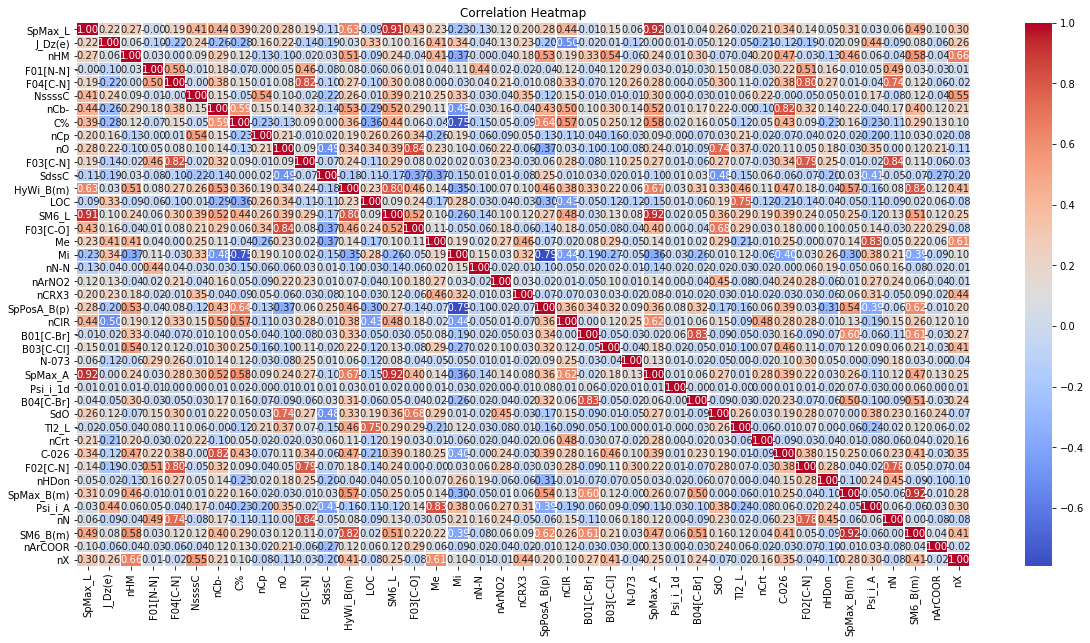

In [3]:
features = df.drop('Class', axis=1)  # Exclude the target variable 'Class' from features

# Computes the correlation matrix
correlation_matrix = features.corr()

# Creates a correlation heatmap of each feature
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [4]:
sns.pairplot(features)
plt.title('Pair Plot')
plt.show()

In [5]:

X = df.drop('Class', axis=1)  # Features (properties) no Class variable drop your traget variable
y = df['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#random_state control the random shuffling of the data before splitting it into training and testing sets

# Instantiate the Random Forest Classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8392857142857143


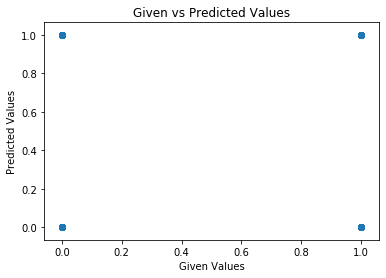

In [6]:
# Create a scatter plot of given vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Given Values')
plt.ylabel('Predicted Values')
plt.title('Given vs Predicted Values')
plt.show()


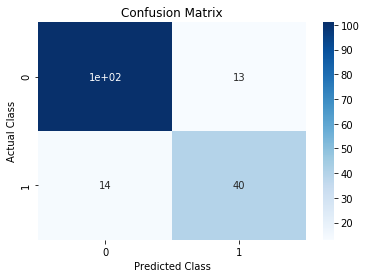

In [7]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

In [8]:
df_test = pd.read_csv('test_rows.csv') #Class is given
df_test
additional_predictions_rf = model.predict(df_test)

# Print the predicted class labels for the additional data
print(additional_predictions_rf)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [9]:
known_values = pd.read_csv('test_rows_labels.csv') #class is given
known_values
class_column = known_values['Class']
class_column

0      1
1      1
2      1
3      1
4      1
      ..
832    0
833    0
834    0
835    0
836    0
Name: Class, Length: 837, dtype: int64

In [10]:
correct_predictions = 0
for pred, known in zip(additional_predictions_rf, class_column):
    if pred == known:
        correct_predictions += 1
    print(f"Predicted: {pred}, Known: {known}")

accuracy = correct_predictions / len(known_values)
print(f"Accuracy: {accuracy}")

Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 

In [11]:
# Create the Support Vector Classifier model
svc_model = SVC()

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svc_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


In [12]:
additional_predictions_svc = svc_model.predict(df_test)

# Print the predicted class labels for the additional data
print(additional_predictions_svc)

[1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [13]:
correct_predictions = 0
for pred, known in zip(additional_predictions_svc, class_column):
    if pred == known:
        correct_predictions += 1
    print(f"Predicted: {pred}, Known: {known}")

accuracy = correct_predictions / len(known_values)
print(f"Accuracy: {accuracy}")

Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 0, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 0, Known: 1
Predicted: 0, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 0, Known: 1
Predicted: 1, Known: 1
Predicted: 1, Known: 1
Predicted: 

In [14]:
# Define the list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

accuracy_10fold = []
accuracy_5fold = []
# Compare the accuracy of each classifier using 10 fold cross-validation
for classifier_name, classifier in classifiers:
    scores_10fold = cross_val_score(classifier, X, y, cv=10)
    scores_5fold = cross_val_score(classifier, X, y, cv=5)
    print(f"{classifier_name}: Accuracy_10fold = {scores_10fold.mean()}: Accuracy_5fold = {scores_5fold.mean()}")


Logistic Regression: Accuracy_10fold = 0.8468445209409063: Accuracy_5fold = 0.8494083262047335
Decision Tree: Accuracy_10fold = 0.7979345955249569: Accuracy_5fold = 0.7873253493013973
Random Forest: Accuracy_10fold = 0.844449225473322: Accuracy_5fold = 0.8386227544910181
Support Vector Machine: Accuracy_10fold = 0.7643717728055078: Accuracy_5fold = 0.7561591103507272
K-Nearest Neighbors: Accuracy_10fold = 0.7942484222604705: Accuracy_5fold = 0.789585115483319


In [15]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Class'].abs().sort_values(ascending=False)
best_columns = correlation_with_target[1:22].index.tolist()  # Selects the top 21 columns with highest correlation
best_columns

['SpPosA_B(p)',
 'SpMax_L',
 'SpMax_A',
 'SM6_B(m)',
 'HyWi_B(m)',
 'nCb-',
 'SM6_L',
 'C-026',
 'nHM',
 'SpMax_B(m)',
 'LOC',
 'F02[C-N]',
 'nCIR',
 'nN',
 'B03[C-Cl]',
 'F03[C-N]',
 'F04[C-N]',
 'nX',
 'C%',
 'nO',
 'NssssC']

In [16]:
# Create an instance of the classifier
classifier = RandomForestClassifier()

# Perform RFE
rfe = RFE(estimator=classifier, n_features_to_select=21)  # Select the top 5 features
rfe.fit(X, y)

# Get the selected feature indices
best_columns_RF = X.columns[rfe.support_].tolist()
best_columns_RF

['SpMax_L',
 'J_Dz(e)',
 'C%',
 'nO',
 'SdssC',
 'HyWi_B(m)',
 'LOC',
 'SM6_L',
 'F03[C-O]',
 'Me',
 'Mi',
 'SpPosA_B(p)',
 'SpMax_A',
 'Psi_i_1d',
 'SdO',
 'TI2_L',
 'F02[C-N]',
 'SpMax_B(m)',
 'Psi_i_A',
 'nN',
 'SM6_B(m)']

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform SelectKBest
selector = SelectKBest(score_func=f_classif, k=21)  # Select the top 5 features
selector.fit(X, y)

# Get the selected feature indices
best_columns_K = X.columns[selector.get_support()].tolist()
best_columns_K

['SpMax_L',
 'nHM',
 'F04[C-N]',
 'NssssC',
 'nCb-',
 'C%',
 'nO',
 'F03[C-N]',
 'HyWi_B(m)',
 'LOC',
 'SM6_L',
 'SpPosA_B(p)',
 'nCIR',
 'B03[C-Cl]',
 'SpMax_A',
 'C-026',
 'F02[C-N]',
 'SpMax_B(m)',
 'nN',
 'SM6_B(m)',
 'nX']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns], df['Class'], test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns_RF], df['Class'], test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns_K], df['Class'], test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8690476190476191
Accuracy: 0.7916666666666666
Accuracy: 0.875


In [19]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns], df['Class'], test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns_RF], df['Class'], test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns_K], df['Class'], test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571
Accuracy: 0.8452380952380952
Accuracy: 0.8511904761904762


In [20]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns], df['Class'], test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = SVC()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns_RF], df['Class'], test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[best_columns_K], df['Class'], test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7738095238095238
Accuracy: 0.7380952380952381
Accuracy: 0.7738095238095238


In [ ]:
# Compare the accuracy of each classifier using 10 fold cross-validation
